In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
urldata = pd.read_csv("Dataset/urldata.csv")
urldata.head(10)

Unnamed: 0                        url   label  result
0           0     https://www.google.com  benign       0
1           1    https://www.youtube.com  benign       0
2           2   https://www.facebook.com  benign       0
3           3      https://www.baidu.com  benign       0
4           4  https://www.wikipedia.org  benign       0
5           5     https://www.reddit.com  benign       0
6           6      https://www.yahoo.com  benign       0
7           7   https://www.google.co.in  benign       0
8           8         https://www.qq.com  benign       0
9           9     https://www.amazon.com  benign       0

In [3]:
urldata.shape

(450176, 4)

In [4]:
urldata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450176 non-null  int64 
 1   url         450176 non-null  object
 2   label       450176 non-null  object
 3   result      450176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
urldata.isnull().sum()


Unnamed: 0    0
url           0
label         0
result        0
dtype: int64

In [6]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [7]:
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [8]:
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [9]:
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [10]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i)) 

In [11]:
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [12]:
urldata.head()

Unnamed: 0                        url   label  result  url_length  \
0           0     https://www.google.com  benign       0          22   
1           1    https://www.youtube.com  benign       0          23   
2           2   https://www.facebook.com  benign       0          24   
3           3      https://www.baidu.com  benign       0          21   
4           4  https://www.wikipedia.org  benign       0          25   

   hostname_length  path_length  fd_length  tld  tld_length  
0               14            0          0  com           3  
1               15            0          0  com           3  
2               16            0          0  com           3  
3               13            0          0  com           3  
4               17            0          0  org           3

In [13]:
urldata = urldata.drop("tld",1)

In [14]:
urldata.head()

Unnamed: 0                        url   label  result  url_length  \
0           0     https://www.google.com  benign       0          22   
1           1    https://www.youtube.com  benign       0          23   
2           2   https://www.facebook.com  benign       0          24   
3           3      https://www.baidu.com  benign       0          21   
4           4  https://www.wikipedia.org  benign       0          25   

   hostname_length  path_length  fd_length  tld_length  
0               14            0          0           3  
1               15            0          0           3  
2               16            0          0           3  
3               13            0          0           3  
4               17            0          0           3

In [15]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [16]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [17]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [18]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))


In [19]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [20]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [21]:
urldata.head()

Unnamed: 0                        url   label  result  url_length  \
0           0     https://www.google.com  benign       0          22   
1           1    https://www.youtube.com  benign       0          23   
2           2   https://www.facebook.com  benign       0          24   
3           3      https://www.baidu.com  benign       0          21   
4           4  https://www.wikipedia.org  benign       0          25   

   hostname_length  path_length  fd_length  tld_length  count-  ...  count?  \
0               14            0          0           3       0  ...       0   
1               15            0          0           3       0  ...       0   
2               16            0          0           3       0  ...       0   
3               13            0          0           3       0  ...       0   
4               17            0          0           3       0  ...       0   

   count%  count.  count=  count-http  count-https  count-www  count-digits  \
0       0       2       0           1            1          1             0   
1       0       2       0           1            1          1             0   
2       0       2       0           1            1          1             0   
3       0       2       0           1            1          1             0   
4       0       2       0           1            1          1             0   

   count-letters  count_dir  
0             17          0  
1             18          0  
2             19          0  
3             16          0  
4             20          0  

[5 rows x 21 columns]

In [22]:
import re

In [23]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' 
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) # Ipv6
    if match:
        return -1
    else:    
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [24]:
def shortening_service(url):
     match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                  'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                  'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                  'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                  'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                  'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                  'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                  'tr\.im|link\.zip\.net',
                  url)
     if match:
         return -1
     else:
         return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [25]:
urldata.head()

Unnamed: 0                        url   label  result  url_length  \
0           0     https://www.google.com  benign       0          22   
1           1    https://www.youtube.com  benign       0          23   
2           2   https://www.facebook.com  benign       0          24   
3           3      https://www.baidu.com  benign       0          21   
4           4  https://www.wikipedia.org  benign       0          25   

   hostname_length  path_length  fd_length  tld_length  count-  ...  count.  \
0               14            0          0           3       0  ...       2   
1               15            0          0           3       0  ...       2   
2               16            0          0           3       0  ...       2   
3               13            0          0           3       0  ...       2   
4               17            0          0           3       0  ...       2   

   count=  count-http  count-https  count-www  count-digits  count-letters  \
0       0           1            1          1             0             17   
1       0           1            1          1             0             18   
2       0           1            1          1             0             19   
3       0           1            1          1             0             16   
4       0           1            1          1             0             20   

   count_dir  use_of_ip  short_url  
0          0          1          1  
1          0          1          1  
2          0          1          1  
3          0          1          1  
4          0          1          1  

[5 rows x 23 columns]

In [26]:
import re

In [27]:
def having_ip_address(url):
    match = re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25                        [0-5])\\.'
                      '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' # IPv4
                      '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
                      '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) # Ipv6
    if match:
        return -1
    else:
         return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [28]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [29]:
urldata.head()

Unnamed: 0                        url   label  result  url_length  \
0           0     https://www.google.com  benign       0          22   
1           1    https://www.youtube.com  benign       0          23   
2           2   https://www.facebook.com  benign       0          24   
3           3      https://www.baidu.com  benign       0          21   
4           4  https://www.wikipedia.org  benign       0          25   

   hostname_length  path_length  fd_length  tld_length  count-  ...  count.  \
0               14            0          0           3       0  ...       2   
1               15            0          0           3       0  ...       2   
2               16            0          0           3       0  ...       2   
3               13            0          0           3       0  ...       2   
4               17            0          0           3       0  ...       2   

   count=  count-http  count-https  count-www  count-digits  count-letters  \
0       0           1            1          1             0             17   
1       0           1            1          1             0             18   
2       0           1            1          1             0             19   
3       0           1            1          1             0             16   
4       0           1            1          1             0             20   

   count_dir  use_of_ip  short_url  
0          0          1          1  
1          0          1          1  
2          0          1          1  
3          0          1          1  
4          0          1          1  

[5 rows x 23 columns]

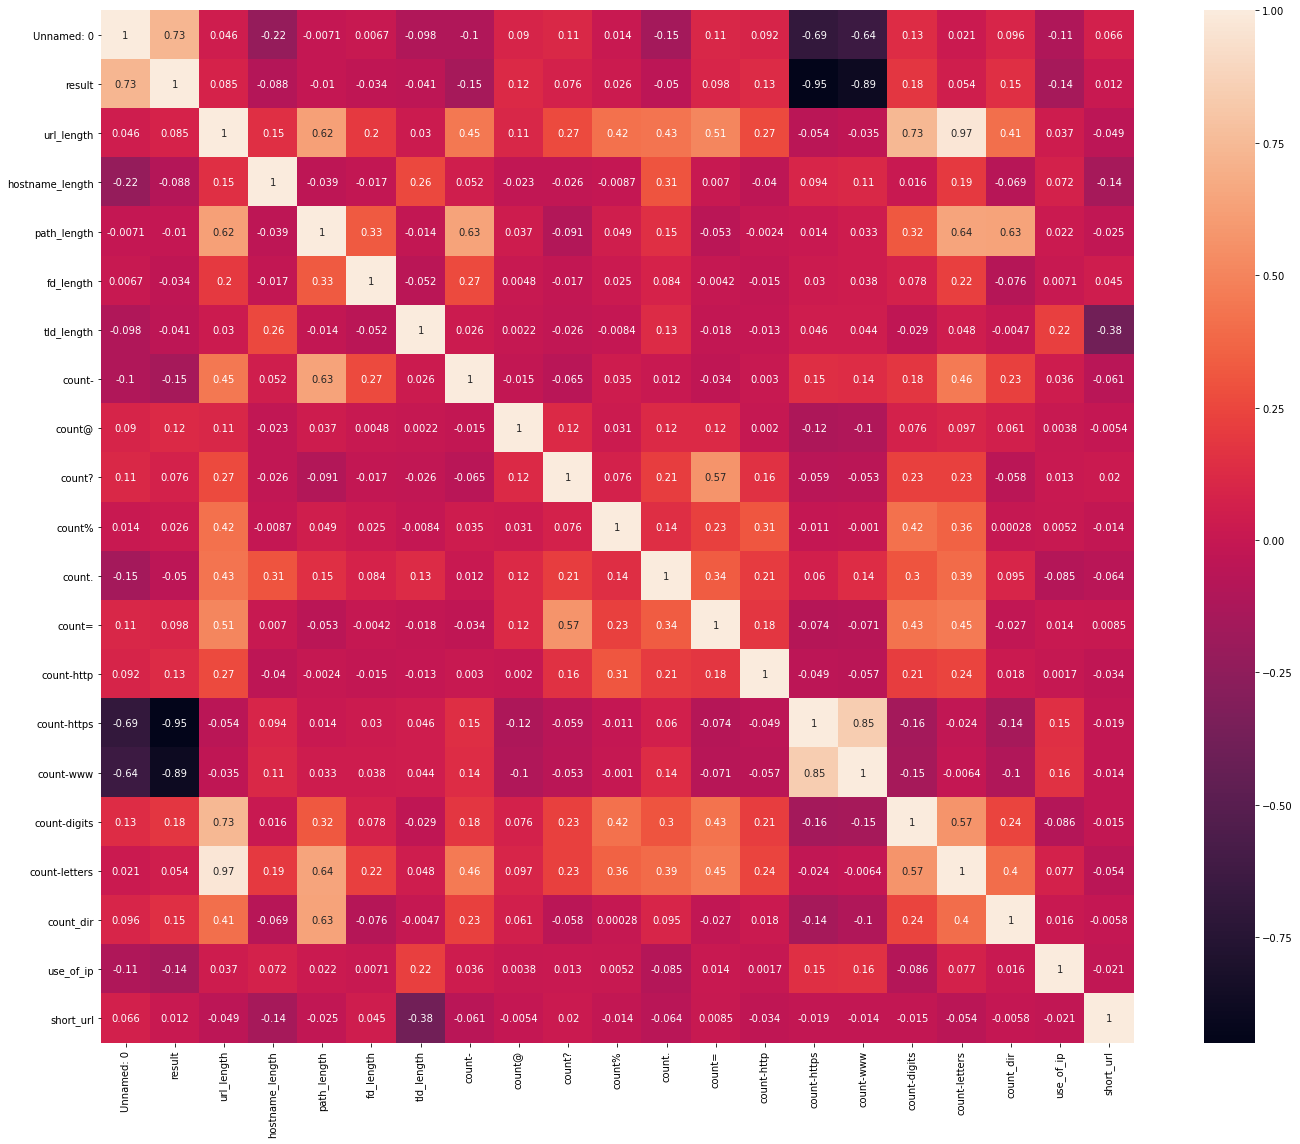

In [30]:
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

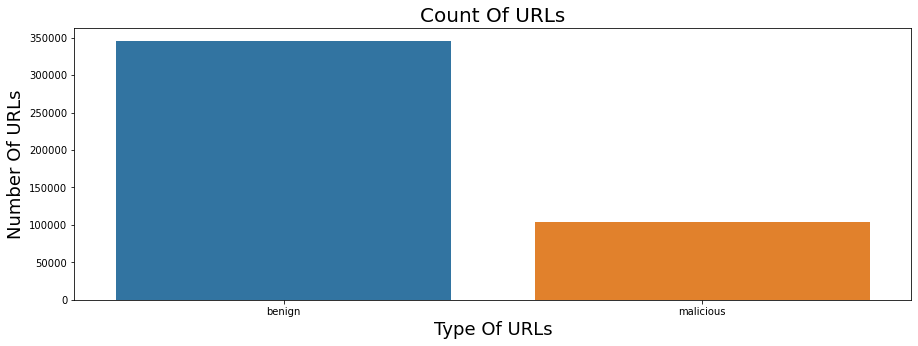

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [32]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))


Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


(0.0, 1000.0)

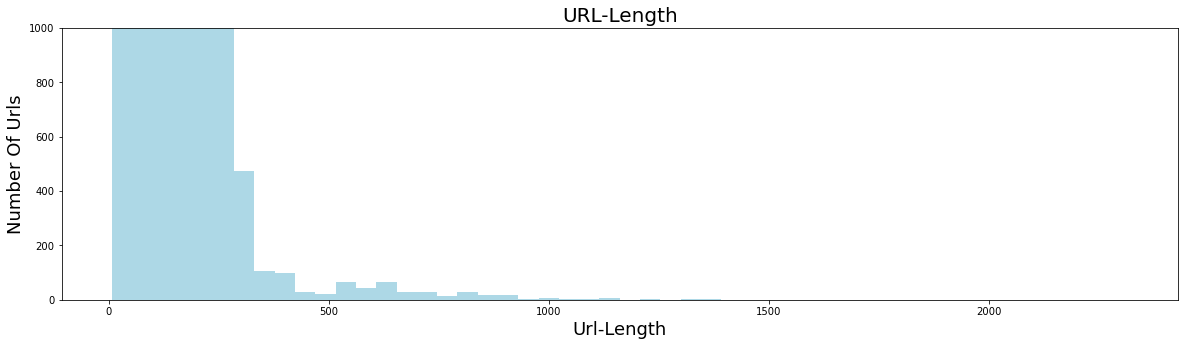

In [33]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

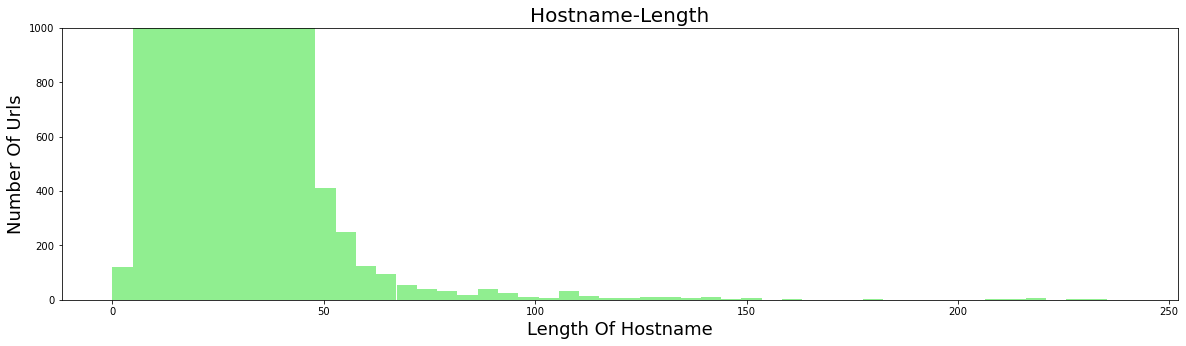

In [34]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

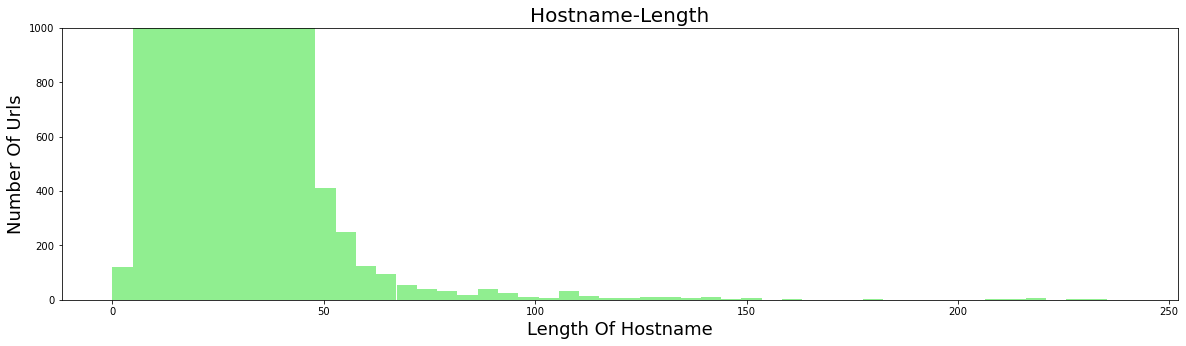

In [35]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

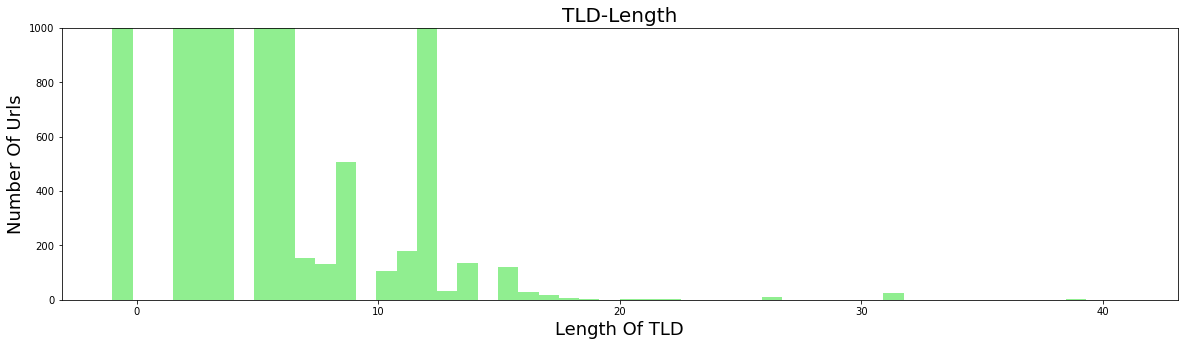

In [36]:
plt.figure(figsize=(20,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

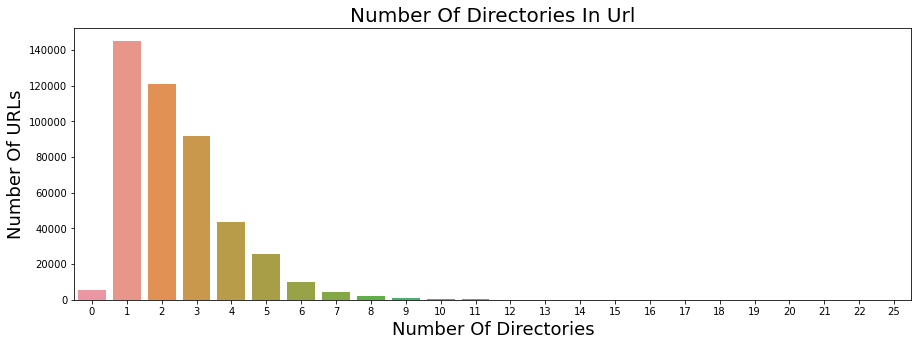

In [37]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

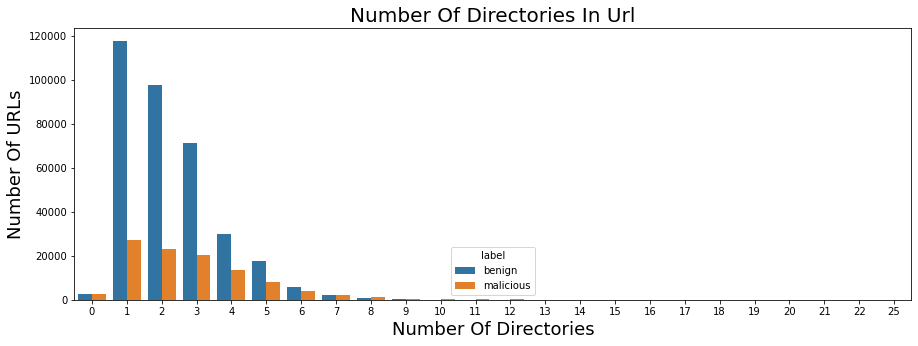

In [38]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

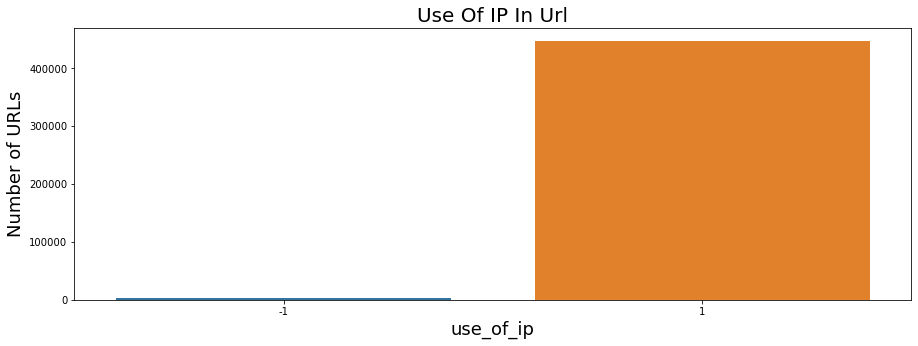

In [39]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
sns.countplot(urldata['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

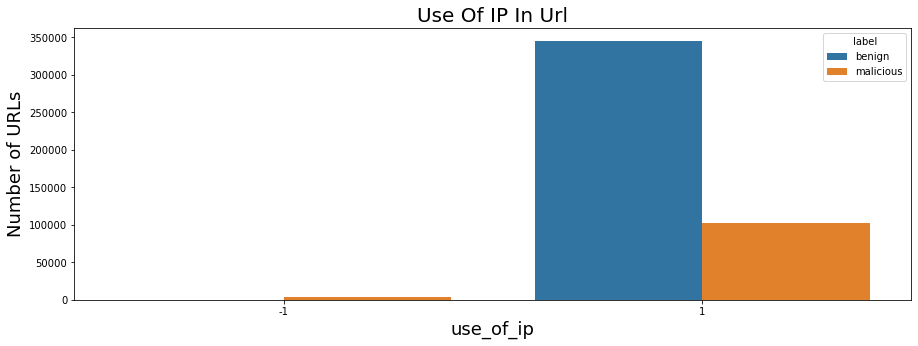

In [40]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['use_of_ip'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

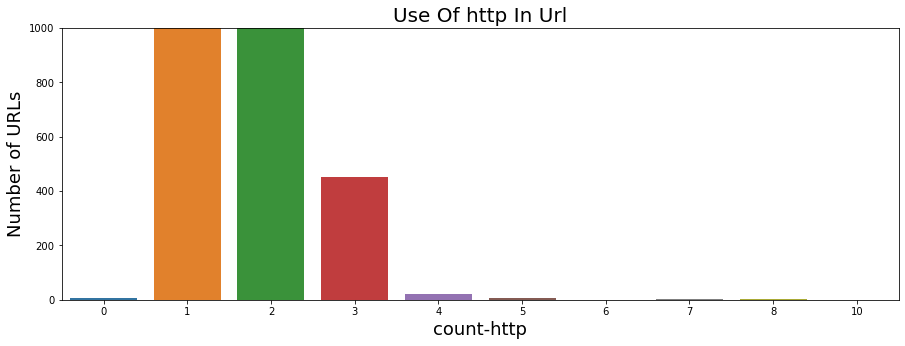

In [41]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

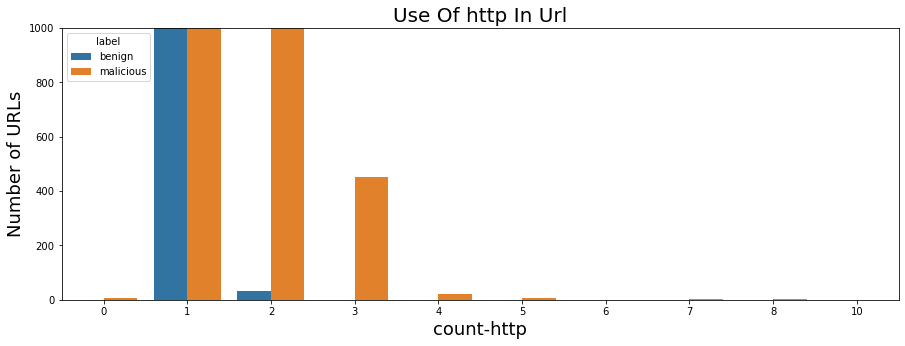

In [42]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

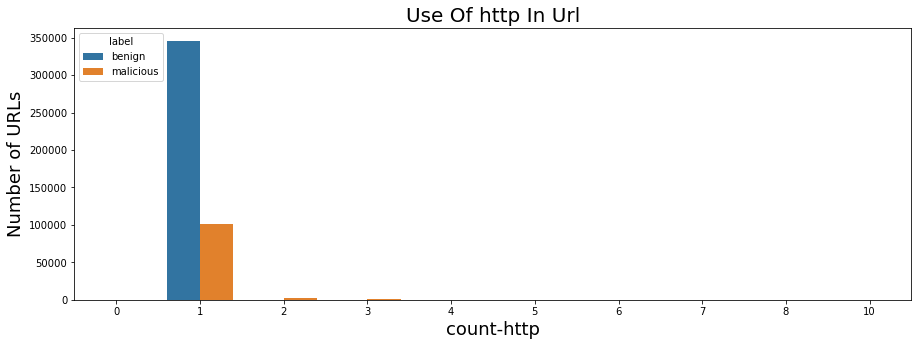

In [43]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

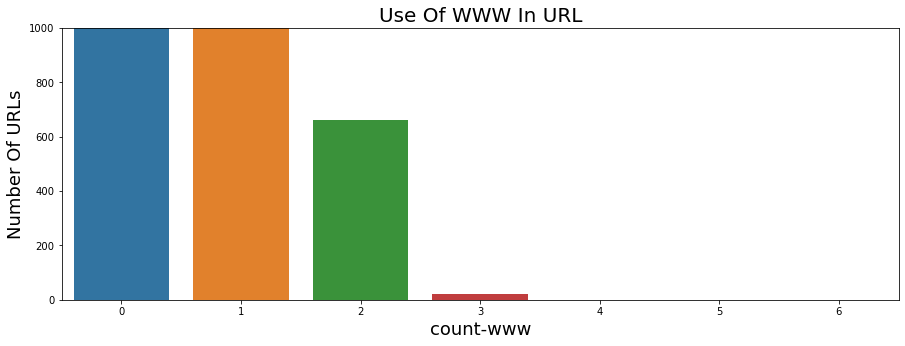

In [44]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(urldata['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

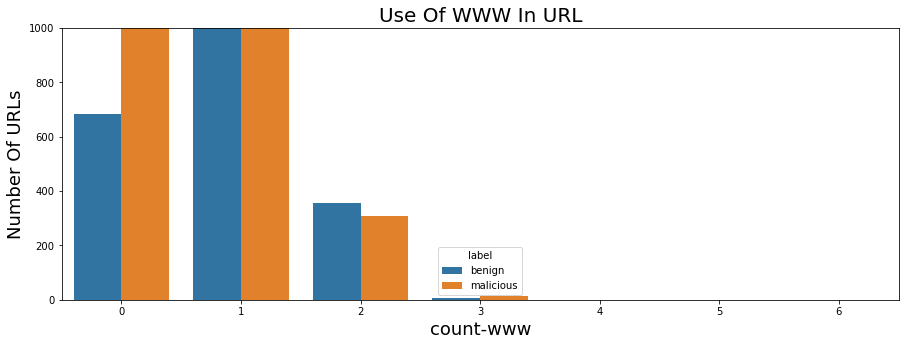

In [45]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(urldata['count-www'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [47]:
x = urldata[['hostname_length','path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
             'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits','count-letters', 'count_dir', 'use_of_ip']]

y = urldata['result']

In [48]:
x.shape

(450176, 17)

In [49]:
y.shape

(450176,)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [51]:
x_train

hostname_length  path_length  fd_length  tld_length  count-  count@  \
350198               26            1          0           2       0       0   
272103               27            1          0           5       0       0   
126442               25           24          6           3       0       0   
181842               12            9          8           3       0       0   
237704               16           25          6           3       1       0   
...                 ...          ...        ...         ...     ...     ...   
259178               15            9          8           3       0       0   
365838               14           38          8           3       1       0   
131932               19           24          5           3       0       0   
146867               24           21          9           3       1       0   
121958               16           17          1           2       0       0   

        count?  count%  count.  count=  count-http  count-https  count-www  \
350198       0       0       5       0           1            0          0   
272103       1       0       5       2           1            1          1   
126442       0       0       2       0           1            1          1   
181842       1       0       3       1           1            1          1   
237704       0       0       2       0           1            1          1   
...        ...     ...     ...     ...         ...          ...        ...   
259178       0       0       2       0           1            1          1   
365838       0       2       2       0           1            0          0   
131932       0       0       2       0           1            1          1   
146867       1       0       3       2           1            1          1   
121958       0       0       2       0           1            1          1   

        count-digits  count-letters  count_dir  use_of_ip  
350198             0             25          1          1  
272103             3             45          1          1  
126442             0             48          2          1  
181842             4             26          1          1  
237704             5             35          3          1  
...              ...            ...        ...        ...  
259178             3             23          1          1  
365838             4             43          3          1  
131932             0             43          3          1  
146867             4             49          2          1  
121958             3             30          2          1  

[135052 rows x 17 columns]

In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_predictions = dt_model.predict(x_test)
accuracy_score(y_test,dt_predictions)

0.9953732498952793

In [53]:
print(confusion_matrix(y_test,dt_predictions))

[[241211    741]
 [   717  72455]]


In [54]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

0.9972677422221093

In [55]:
print(confusion_matrix(y_test,rfc_predictions))

[[241663    289]
 [   572  72600]]


In [56]:
log_model = LogisticRegression(verbose=0)
log_model.fit(x_train,y_train)
log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

d:\Projects\Malicious_URL_Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9957953059747908

In [57]:
print(confusion_matrix(y_test,log_predictions))

[[241397    555]
 [   770  72402]]


## Testing Model

In [58]:
test_url = "http://192.168.61.2.org/adffcfg/szgdh/bbakjdxkjls/sacfhgbhdsgvfhhgkrkfdbkfjdb/@#vbgfjghgdckjfvjhvgjkv@@#$$%r/"
hostname_length = lambda i: len(urlparse(i).netloc)
pred = []
length = hostname_length(test_url)
pred.append(length)
path_length_finder1 = lambda i: len(urlparse(i).path)
path_length = path_length_finder1(test_url)
pred.append(path_length)
fd_length_finder = lambda i: fd_length(i)
fd_length = fd_length_finder(test_url)
pred.append(fd_length)
tld_length_finder= lambda i: tld_length(i)
tld_length = tld_length_finder(test_url) 
pred.append(tld_length)
count_hiphen_finder = lambda i: i.count('-')
count_hiphen = count_hiphen_finder(test_url) 
pred.append(count_hiphen)
count_at_finder = lambda i: i.count('@')
count_hiphen = count_at_finder(test_url)
pred.append(count_hiphen)

count_questionmark_finder = lambda i: i.count('?')
count_questionmark = count_questionmark_finder(test_url)
pred.append(count_questionmark)

count_percentage_finder = lambda i: i.count('%')
count_percentage = count_percentage_finder(test_url)
pred.append(count_percentage)

count_dot_finder = lambda i: i.count('.')
count_dot = count_dot_finder(test_url)
pred.append(count_dot)

count_equalto_finder = lambda i: i.count('=')
count_equalto = count_equalto_finder(test_url)
pred.append(count_equalto)

count_http_finder = lambda i: i.count('http')
count_http = count_http_finder(test_url)
pred.append(count_http)

count_https_finder = lambda i: i.count('https')
count_https = count_https_finder(test_url)
pred.append(count_https)

count_www_finder = lambda i: i.count('www')
count_www = count_www_finder(test_url)
pred.append(count_www)

count_digits_finder = lambda i: digit_count(i)
count_digits = count_digits_finder(test_url)
pred.append(count_digits)

count_letters_finder = lambda i: letter_count(i)
count_letters = count_letters_finder(test_url)
pred.append(count_letters)


count_directories_finder = lambda i: no_of_dir(i)
count_directories = count_directories_finder(test_url)
pred.append(count_directories)

count_ip_address_finder = lambda i: having_ip_address(i)
count_ip_address = count_ip_address_finder(test_url)
pred.append(count_ip_address)

print(pred)
pred_2d = []
pred_2d.append(pred)
print(pred_2d)

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)
rfc_predictions = rfc.predict(pred_2d)
rfc_predictions

[16, 56, 7, 109, 0, 3, 0, 1, 4, 0, 1, 0, 0, 9, 79, 5, 1]
[[16, 56, 7, 109, 0, 3, 0, 1, 4, 0, 1, 0, 0, 9, 79, 5, 1]]


array([1], dtype=int64)